*Authors:* 

# Lesson 8: Reading and writing of data

We often need to read or write data from/to a file. We could, for example, need to read measurement data from a file, do some computation with that data, and finally store the results in a different file for further processing. 

Before we start with the practical part, we should first discuss a few basic concepts.
## What is data
Data refers to any information that are collected, stored, and processed by a computer system. 
Data is represented as a stream of bytes.
A byte consist of 8 bits and a bit has values of either 0 or 1.
To us, data can take various forms, such as numbers, text, images, audio, video, and more.
You may find that this definition is a very broad one, data is basicly everything and this loose definition is intended.
By default data **has no meaning** to the computer, its just a series of 0 and 1.
What these 0 and 1 represent depends on the context, which we as user tell the computer.
For example: Let's say your computer reads: 01000001 in binary. When your context is `str` you would see an "A", if your context is an `int` you would get 65. 
A Float interpretation is even more complex since it depends on the actual implementation of floats. 
You see data means first of all only that there is a stream of information. 
The actual interpretation is up to us.

## Files

Data can be stored in files, a permanent way to handle data. Files are again only a stream of data, but ordered in a specific way with meaning for us. 
In most operating systems (in our case the operating system is linux) files consist of 3 parts, as shown in the following figure.

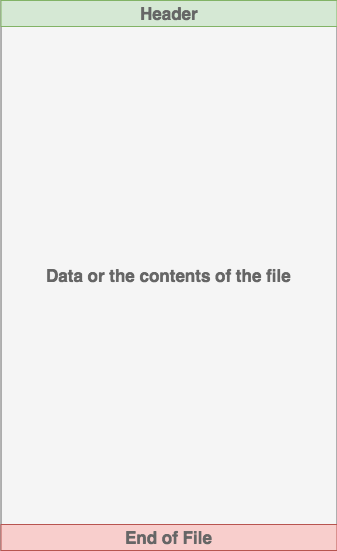  
[[source]](https://files.realpython.com/media/FileFormat.02335d06829d.png)

- The "Header" contains metadata such as the filename, the filetype, its size etc. 
This is the information we need to actually interpret the following "Data". 
You can think of the "Header" as a guideline to our data, that explains what it is and how to read it. 
- The "Data" part contains the actual data we want to interpret. Our computer reads the stream of data and stops only when reaching a very specific character.
- "End of File" (EOF) character is a special symbol that tells the operating system that the end of the file is reached.

Usually when we implement the tools to read files, we are only interested in the header or EOF parts. The actual users of the program (could also be us) are only interested in the data part of a file.

### File Extensions
The data can consist of any set of bytes and, as explained before, what it means depends on the application. But to make things easier for everyone, data of certain (interpretation) type are usually stored in certain file types, following specific standards. There are many commonly used file types, such as text files, image files etc. and the type is usually indicated by a so-called "extension" that is appended to the end of the filename.
A file called "myfile.txt" has the ".txt" extension and usually contains text data, a file with the ".gif" extension is expected to contain an animation in the gif format and a file with ".mp3" usually contains music in the mp3 format. The file of the above figure is called `FileFormat.02335d06829d.png` and has the extension ".png" indicating that it contains an image stored in the "png" format. 

The most important word here is "expected". The file extension does not enforce the actual type. The extension is a friendly hint to the programmer to say: "This is a file of type, you know what to do from now on'. Nothing actually stops you from renaming this extension to something else. As we've discussed, the information needed to interpret the data is written in the 'Header", but to read the header, one first needs to open the file (And since this can take time, one often wants to avoid this). Therefore, many (or most) applications do not actually check the header information, but instead trust the file extension. An image editing software, for example, will most likely treat every file with an `.png` extension as image stored on the `png` format. But if the file actually contains something entirely different, unforeseen things can happen. Therefore: Be nice and always use the correct extensions!

In all cases the extension starts with a dot "." and is the last part of the filename. Looking again at the `FileFormat.02335d06829d.png` example, you will see that there are multiple dots in the filename. That is ok. We are allowed to put additional dots at other positions of the filename, only the last one starts the file extension part. 

### File name conventions
Speaking about filenames, there are a couple of best practices we should follow since not all operating systems can handle all characters. We should not use spaces ` ` or Umlaute in the filename. If we want to separate words we best use a `-` or `_`. We should also not use special symbols such as `!\"§$%&/()[]{|}*+` and so on. Please follow these conventions, since they have good reasons! For example, most terminal applications use empty spaces ` ` as separators between arguments of commands. If your file name were to contain a space, e.g. "My File", and you were to pass it to some terminal application as input, the application most likely will read it as 2 files instead. 

### Paths
In addition to a name, each file has a **path** that tells the operating system where the file is located. The path consists of two parts, the location and the filename itself.
Your file system is interpreted as hierarchy of directories, separated by `/` (in Linux and macOS) and `\` (in Windows, which is very annoying, due to `\` being used as special character in many places). In Linux, the topmost directory is called the **root directory** and has the path `/`  (the closest equivalent in Windows would be e.g. `C:\`). It is not to be confused with the home directory `/root` of the root user. The location is always given relative to a specific starting point. 
If the starting point is `/`, the path is called **absolute path**, if it is relative to anything else, like e.g. your current directory, it is called **relative path**.  

For me, the author of this notebook, the **absolute path** of this notebook is 
`/afs/physnet.uni-hamburg.de/users/ex_ba/MyName/computeranwendungen-in-der-physik/grundlagen-material/08_data.ipynb` which means that the file is called `08_data.ipynb` and is located in the directory `grundlagen-material` which itself is in the directory `computeranwendungen-in-der-physik` and so on. The directory `afs` is located directly in the root directory. This is indicated by the leading `/` at the beginning of the path.
A relative path on the other hand is missing the `/` at the beginning. As an example, lets assume that our current working directoy has the absolute path `/afs/physnet.uni-hamburg.de/users/ex_ba/MyName/`. From there, the relative path to our example file would be `computeranwendungen-in-der-physik/grundlagen-material/08_data.ipynb`.

There are also 2 special "directories": `.` and `..`:
- `.` represents the current directory you are sitting in
- `..` represents the parent directory (one `/` before) from our current location

Lets imagine we write some code that should open a file. If our code is executed in the same directory as the file, the relative path is just the filename. If our code were executed in the directory `/afs/physnet.uni-hamburg.de/users/ex_ba/MyName/` the relative path to this notebook would be `computeranwendungen-in-der-physik/grundlagen-material/08_data.ipynb`. When we want to use a file in our code, we can usually use either the absolute or the relative path. Which of the two we want to use usually depends on the application.

## Character encodings and a small recap about encoding history
The data in a file is stored as bytes. If one opens a text file, such as a ".txt" file, the computer needs to know how to translate the bytes into text. This instruction is called an **encoding**.
There are many different encodings, the most prominent ones for English speaking persons are ASCII (which contains 128 different characters = $2^7$=7-bit) and UTF-8 (which contains 1,112,064 different characters). 

The use of a specific encodings determines the amount of memory a string actually consumes. For example, to encode all the letters used in the English language and a good portion of needed control characters one only needs 7-bit, which is what the pure ASCII does. (Sometimes people say: ASCII uses 8-bit. The reason for that statement is that most hardware operations are optimized on the byte level (8-bits), so it is natural to extend ASCII a little bit without much loss in performance. The addition of the 8th bit allows for 128 additional symbols which can be used to include, for example, German umlauts and the ß.  

Nowadays, the most frequently used encoding is called UTF-8. UTF-8 is a variable length encoding with up to 32 bit length. It contains 1,112,064 different characters, which is enough to cover most languages. It even contains some emojis!
(Today >99% of world uses UTF-8 for a good reason. Before it, different languanges needed different encondings, which lead to a mess and many broken websites. To solve this issue in a globalized world and to prevent a fragmentation of the internet, UTF was created.)

Ok, but what does this mean to us? A text file should alway be read with the same encoding as it was written. If a file was written in the UTF-8 enconding and we try to open it with the ASCII encoding, there might be characters that are not contained in the ASCII encoding, leading either to errors or wrong output. This is the reasoning why encoding should be specified explicitly when reading files, even if almost the whole world currently uses UTF-8.

If we want to read files that were already written by our own code, we usually do not need to worry about the encoding. But we might encounter encoding problems when opening files that were written by code created by other developers, so it's good to at least know about the term. 

You can learn more about different encodings [here](https://en.wikipedia.org/wiki/Character_encoding) and [here](https://docs.python.org/3/howto/unicode.html).

## Line endings
Another issue we might encounter has to do with the symbol that indicates the end of a line. We will later see that we can read and write files line by line. But how does the computer know when the line is finished? There is a special character `\n`, called "line feed", that indicates the end of the line. A possible complication arises because Linux and Mac only use this character, while MS Windows uses the line-feed character `\n` together with the "carriage return" character `\r` which places the cursor at the begin of the line. If we would try to open a file using `\n\r` on Linux we might get an output that has additional empty lines.

Again, this is probably not an issue we will encounter often, but this information might come in handy some day.

In addition, knowing about the `\n` and `\r` characters is useful since we can also use them with the `print()` function in python as shown here:

In [ ]:
print('Hello World')

In [ ]:
# insert a line break in the printout
print('Hello\n World')

In [ ]:
# delete the first word by resetting the cursor to the start of the line
print('Hello\r World')

## Opening and closing files

Now we are finally ready to really start working with files. 

First we actually need a file and we will create one right now using a JupyterLab [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html). Specifically: we will use the `%%writefile` magic command to write the content of the next cell to a file called "test.txt".



In [ ]:
%%writefile test.txt
Wikipedia says:
A computer file is a computer resource for recording data in a computer storage device, primarily identified by its file name.
Just as words can be written to paper, so can data be written to a computer file.
Files can be shared with and transferred between computers and mobile devices via removable media, networks, or the Internet.
Different types of computer files are designed for different purposes.
A file may be designed to store an Image, a written message, a video, a computer program, or any wide variety of other kinds of data.
Certain files can store multiple data types at once.
By using computer programs, a person can open, read, change, save, and close a computer file.
Computer files may be reopened, modified, and copied an arbitrary number of times.
Files are typically organized in a file system, which tracks file locations on the disk and enables user access.

Now let's learn how to open a file, which is really quite simple: We use the `open()` function which takes as input the path of the file (and optionally some other things) and returns a **file object**. But, you do not actually read the file with `open`! An analogy with books would be: `open` locates your book (directory), opens it, and **points** your eyes (file pointer) to the first page and line. 
The opposite of open is `close`. 

Lets try this:

In [ ]:
myfile = open('test.txt')
print(myfile)
myfile.close()

We can see that the `open()` function returns an object of the class `_io.TextIOWrapper` which is a special file class for handling text files. Python figured out that the file is a text file and openend it as such. We can also see that encoding is `UTF-8`. There is also a `mode=r` which means that the file was opened in "read" mode. We can currently only read from the file.

We also notice, that after we are done, we closed the file using the `close()` method of the file object. We should always remember to close files after we are done with them!!! Why? To prevent data loss or weird problems such as one that can occur because only a limited number of files can be openend at once. (More information [here](https://realpython.com/why-close-file-python/).)

To avoid forgetting to close the file it's **almost always** a good idea to use a **context manager** that will take care of the closing for us. The code for this looks like this:

In [ ]:
with open('test.txt') as myfile:
    # everything we want to do with the file should be here
    print(myfile)
    print(myfile.closed)

# Now the file has been closed by the context manager
print(myfile.closed)

The `with` statement creates a **context manager** that will open and manage the file for us as long as the **context** is active. The context is whatever happens within the indented block below the `with` statement. Every interaction with the file object has to happen within this indented block. After all instructions in the indented block are done the context manager will close the file for us. 

We saw earlier that the file was openeded with `mode=r` which means that we can only read from the file. We can specify the mode as the second argument of the `open()` function. If we do not specify anything the read-only mode is chosen as default.

In [ ]:
# open the file in read-only mode
with open('test.txt', 'r') as myfile:
    # everything we want to do with the file should be here
    print(myfile)

There are a couple of different modes we can choose depending on our needs:

- "r": read - opens the file to read. The **file pointer** is placed at the beginning (the reading starts at the beginning). Produces an error if the file does not exist
- "w": write - opens the file for writing. The file pointer is placed at the beginning (the writing starts at the beginning, replacing existing content). Creates the file if it does not exist.
- "a": append - opens the file for appending. The file pointer is placed at the end (the writing will start at the end after existing content). Creates the file if it does not exist. 
- "x": create - creates the file. Returns an error if the file already exists.
- "r+": read and write - opens the file in read and write mode. The file pointer is placed at the beginning.
- "w+": write and read - opens the file in write and read mode. The existing content is erased. Creates the file if it does not exist.

There are also other modes and additonal parameters for the `open` function that allow for example to open the file in byte mode (without decoding the data) or to specify an encoding. Without further specification the file will be openended in text mode (with the content being decoded to text, according to the chosen encoding) which is often what we want anyways.

You can learn more about the `open()` function in the official [documentation](https://docs.python.org/3/library/functions.html#open)

## Reading data from a file

Now that we know how to open and close a file, we will next learn how to read data from it.

The file object has 3 methods we can use to read the content:

- `read(size = -1)`: Read `size` bytes and return the read content. If the value is negative (which is the default value), it will read the entire file until the EOF symbol is reached. 
- `readline(size = -1)`: Read a line. If `size` is not negative, at most `size` bytes will be read. If `size` is negative or larger that the line size, the returned string has the newline character at the end.
- `readlines()`: Read the remaining lines and return them as a list.

When we first open a file, the **file pointer** is placed at a position depending on the chosen mode. Reading will start from the position of this file pointer and then place the file pointer to a new position right after the last character that was read. That way, the first call of, for example, `readline()` will return the first line, the second call the second line and so on. If we want to read the first line again we could either close and reopen the file or manually place the file pointer back to the beginning. (There is a method `tell()` that returns the current position of the file pointer and a method `seek()` with which we can move the file pointer. But manipulating the file pointer is usually not necessary.) 

Let's try the different methods and see what happens. We will start with the `read()` method:

In [ ]:
# read the whole file
with open('test.txt', 'r') as myfile:
    mystring = myfile.read()
print('type of the returned object', type(mystring))
print('\nContent of the file:\n')
print(mystring)

As we can see, the object that is returned from the file is a string. And when we print that string we see that it contains the whole text, including line breaks etc. We can actually show the new line symbol using the `repr()` function:

In [ ]:
print(repr(mystring))

We learned earlier that the file is closed automatically by the context manager. What happens if we try to read from it after its closed?

In [ ]:
# read the whole file after it is closed
with open('test.txt', 'r') as myfile:
    print('doing nothing within the context')
#mystring = myfile.read()

As expected this produces and Error.

Now lets try to read the whole file in chunks of 4 characters. For this we will write a loop that runs until the EOF character is reached. The EOF character is an empty string `""`

In [ ]:
# read the whole file in chunks of 4 characters
with open('test.txt', 'r') as myfile:
    # read and print the first chunk
    mystring = myfile.read(4)
    print(repr(mystring))
    # read and print the remaining chunks
    while mystring != '':
        mystring = myfile.read(4)
        print(repr(mystring))

We can see that each chunk, with the exception of the last two, contains 4 character and that the newline character `\n` counts as character for this purpose. The second to last chunk only contains one character because after this the EOF file is reached. And the last chunk is the empty string, i.e. the EOF character. 

Often line breaks have a meaning. In our example, each line contains exactly one sentence. In other cases each line could represent a measurement of an experiment. Motivated by this we will now try to read the file line by line:

In [ ]:
# read the whole file one line at a time
with open('test.txt', 'r') as myfile:
    # read and print the first line
    mystring = myfile.readline()
    print(mystring)
    # read and print the remaining lines
    while mystring != '':
        mystring = myfile.readline()
        print(mystring)

The empty lines between each line are there because the newline character is included in the return string and the print function by default adds another newline, as we can see if we print the lines using the `repr()` function:

In [ ]:
# read the whole file one line at a time
with open('test.txt', 'r') as myfile:
    # read and print the first line
    mystring = myfile.readline()
    print(repr(mystring))
    # read and print the remaining lines
    while mystring != '':
        mystring = myfile.readline()
        print(repr(mystring))

There is another, more "pythonic" way we could have written the above loop: We can "iterate over the file object" in the same way we can loop over a list:

In [ ]:
# read the whole file one line at a time
with open('test.txt', 'r') as myfile:
    for line in myfile:
        print(repr(line))

This works because the file object has a built-in iterator method that calls `readline()` for us and returns its output.

Often we want to read all lines of a file and put them in a list for further processing after the file is closed.
To do this we could use a loop over the file and then append each line to our list.
But we can also use the `readlines()` method:

In [ ]:
# read the whole file into list of lines using readlines
with open('test.txt', 'r') as myfile:
    list_of_lines = myfile.readlines()
print(list_of_lines)

The list now contains a string for each line.

We can achieve the same using the `list()` function on the file object:

In [ ]:
# read the whole file into list of lines using list()
with open('test.txt', 'r') as myfile:
    list_of_lines = list(myfile)
print(list_of_lines)

To get rid of the newline symbols, one could manually strip them, e.g., using

In [ ]:
'line with newline at the end\n'.strip('\n')

Another option is `rstrip()` to only strip from the right side of the string.

A more compact option if the file is not too large is to read it as a single string and then use the `splitlines()` method of `str`.

Try these options, because you might need them later.

## Writing data to a file

To write data to a file we can use 2 methods:
- `write(string)`: Write the string `string` to the file at the current position of the file pointer. Then move the file pointer to the end. Does not add a newline character.
- `writelines(seq)`: Write the sequence `seq` to the file at the current position of the file pointer. Then move the file pointer to the end. Does not add a newline character after each item of the sequence.

Both methods do not add newline characters which means we have to do this ourselves.
Let's try the methods starting with the write method and a list of strings without newline characters:

In [ ]:
# List of strings we want to write:
list_of_strings = ['Hello', 'World', '!' ,'Python', 'is my favourite language!']
# now open the file in write mode
with open('write_test.txt', 'w') as myfile:
    for mystring in list_of_strings:
        myfile.write(mystring)

# Now open the file in read mode and print the content
with open('write_test.txt', 'r') as myfile:
    content = myfile.read()
print(content)

We see that there are no line breaks. Most of the time this is not what we want. Let's do it again, but this time we will add the newline character to each string before we write it:


In [ ]:
# List of strings we want to write:
list_of_strings = ['Hello', 'World', '!' ,'Python', 'is my favourite language!']
# now open the file in write mode
with open('write_test.txt', 'w') as myfile:
    for mystring in list_of_strings:
        # We add the newline character to the end of the string we pass to the write method
        myfile.write(mystring + '\n')

# Now open the file in read mode and print the content
with open('write_test.txt', 'r') as myfile:
    content = myfile.read()
print(content)

Much better. We can also observe that the previous content without the line breaks is not there anymore. The reason is that the content is erased if we open a file with the "w" write mode. If we want to append things to a file we need to open it in append mode:


In [ ]:
# List of strings we want to write:
list_of_strings = ['Some', 'more', 'lines']
# now open the file in write mode
with open('write_test.txt', 'a') as myfile:
    for mystring in list_of_strings:
        # We add the newline character to the end of the string we pass to the write method
        myfile.write(mystring + '\n')

# Now open the file in read mode and print the content
with open('write_test.txt', 'r') as myfile:
    content = myfile.read()
print(content)

Now lets try the `writelines` method. But first we will replace the list of strings with a new list where we appended the newline to each string:

In [ ]:
# List of strings we want to write:
list_of_strings = ['Hello', 'World', '!' ,'Python', 'is my favourite language!']
# new list with linebreaks
list_of_strings_with_newline = []
for s in list_of_strings:
    list_of_strings_with_newline.append(s + '\n')

# now open the file in write mode
with open('write_test.txt', 'w') as myfile:
    # write the list of strings
    myfile.writelines(list_of_strings_with_newline)

# Now open the file in read mode and print the content
with open('write_test.txt', 'r') as myfile:
    content = myfile.read()
print(content)

Do the `write()` and `writeline()` methods need strings? Let's try it with some numbers:

In [ ]:
# open the file in write mode
#with open('write_test.txt', 'w') as myfile:
#    myfile.write(12)

We get the following error stating that the argument has to be a string. We therefore always need to convert whatever we want to write to a string first.



In [ ]:
# List of numbers we want to write:
list_of_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
# now open the file in write mode
with open('write_test.txt', 'w') as myfile:
    for item in list_of_numbers:
        # convert to string and also add newline
        myfile.write(f'{item}\n')

# Now open the file in read mode and print the content
with open('write_test.txt', 'r') as myfile:
    content = myfile.read()
print(content)

## CSV and other common file formats

Depending on the data we are processing it is often a good idea to write the data in the file in a specific structure or format. Imagine, for example, that we want to store a table of measurement values. If we want to read the table again at some later time we need to somehow also make clear what the columns and rows are. To solve this we could write each row as a separate line. And for the columns we could introduce a specific character that would symbolize where the columns start and end. Such a special character is called delimiter and obviously should not be a character that is used for the content of the table. If we use the `.` as decimal sign we could for example use the comma `,` as delimiter. When reading the file, we could then get the content of a cell by reading the line and then splitting the returned line according to the delimiter.


This way of storing a table is a commonly used format called "comma separated values" or **csv** and you will probably encounter it multiple times during your studies. Most table software, for example MS Excel, can also convert their tables to this format. Files with data stored in the csv format have the extension `.csv`. And since it is such a common format there is already a python module, called `csv` that handles the reading and writing for us. 

Let's first write a csv table using JupyterLab magic

In [ ]:
%%writefile table_test.csv
Name,Species,Age,Food
Bob,cat,10,cat food
Joe,parrot,30,fruit and seeds
Huey,parrot,10,fruit and seeds
Dewey,parrot,10,fruit and seeds
Louie,parrot,10,fruit and seeds
Edd,emu,7,acacia and grasses
,,,

Now we will read the table using the `csv` module

In [ ]:
# import the module
import csv

# open the file
with open('table_test.csv') as csv_file:
    # create a csv reader object
    # the second argument is the delimiter. The default value is ',' but we could choose a different one.
    csv_reader = csv.reader(csv_file, delimiter=',')

    # A counter to count the lines
    line_count = 0
    # loop over lines of the table
    for row in csv_reader:
        # Each row is a list with the column contents as elements
        # The first line contains the table header with the column names
        if line_count == 0:
            # print the raw row
            print(row)
            line_count += 1
        else:
            #print the raw row
            print(row)
            # Now do something with the data in the row
            print(row[0], 'the', row[1], 'is', row[2], 'years old and eats', row[3], '\n')
            line_count += 1

So what happened here?

First we opened the file. Then we created a reader object using the initializer for the `reader` class from the `csv` module. The initializer takes the file object and as second optional argument the delimiter character. In our case this is the comma `','` which is also the default value. But if the data itself contains commas, the comma is not a good delimiter. In that case we could have chosen another one such as for example `;`. (In English the decimal sign is a dot `.` and not a comma. Since one would not expect commas to occur in numerical tables, the comma as default delimiter is a reasonable choice.)

Next, we iterated over the rows of the reader (remember the iteration over the file object we did earlier?). Each row is a list containing the data between the delimiters. And each element is a string, even the numbers. If we want to treat them as numbers again we therefore need to convert them using for example the `int()` or `float()` functions. 

In the last column we can also see that spaces are treated as data.

For further processing of the data in the table we could store the rows or list elements in a list ( or list of lists) or a dictionary.

Sometimes it is useful to have the content of each row in a dictionary where we can access the values in each column using the column names. To do this we can use a special reader called `DictReader` from the csv module. `DictReader` will use the first row as the keys for the values. Then we can iterate over rows and each row will be a dictionary:

In [ ]:
# import the module
import csv

# list to hold the rows
list_of_rows = []
# open the file
with open('table_test.csv') as csv_file:
    # create a csv DictReader object
    csv_dict_reader = csv.DictReader(csv_file)
    # loop over rows
    for row in csv_dict_reader:
        print(row)
        list_of_rows.append(row)

# We can then access the data of each column using the column names as keys
for row in list_of_rows:
    print(row['Name'], 'the', row['Species'], 'is', row['Age'], 'years old and eats', row['Food'])


We can also write csv files using the `writerow` method of the `writer` or `DictWrite` classes from the `csv` module.

For the `writer` class this could look like this:

In [ ]:
# import the module
import csv

# list of rows we want to write
list_of_rows = [
    ['Toto', 'dog', '5', 'dog food'],
    ['Simba', 'lion', '10', 'unfortunate smaller animals'],
    ['Donald', 'duck', '86', 'hot dogs'],
]

# open the file in write mode
with open('table_write_test.csv', 'w') as csv_file:
    # create a csv writer object
    csv_writer = csv.writer(csv_file)
    # write the header row
    csv_writer.writerow(['Name', 'Species', 'Age', 'Food'])
    # loop over list of rows and write each of them
    for row in list_of_rows:
        csv_writer.writerow(row)

# Now open the file as a text file and see what was written
with open('table_write_test.csv') as myfile:
    content = myfile.read()
    print(content)

We can also use `DictWriter` to write data contained in dictionaries. To know which field to put into the table the `DictWriter` object also requires a list of dictionary keys to use as column names. This is passed as the `fieldnames` argument to the initializer. We obviously need to make sure that the keys have the same name in all dictionaries. Let's take a look at an example:

In [ ]:
# import the module
import csv

# list of dictionaries we want to write
list_of_rows = [
    {'Name': 'Toto', 'Species': 'dog', 'Age': '5', 'Food': 'dog food'},
    {'Name':'Simba', 'Species': 'lion', 'Age': '10', 'Food': 'unfortunate smaller animals'},
    {'Name':'Donald', 'Species': 'duck', 'Age': '86', 'Food': 'hot dogs'},
    {'Name':'Smaug', 'Species': 'dragon'},
]

# open the file in write mode
with open('table_write_test.csv', 'w') as csv_file:
    # create a csv DictWriter object
    csv_dict_writer = csv.DictWriter(csv_file, fieldnames = ['Name', 'Species', 'Age', 'Food'])
    # loop over list of rows and write each of them
    for row in list_of_rows:
        csv_dict_writer.writerow(row)

# Now open the file as a text file and see what was written
with open('table_write_test.csv') as myfile:
    content = myfile.read()
    print(content)

We see that the last line does not contain entries for the age and food of the Smaug the dragon. The reason is that there are no fields with the `'Age'` or `'Food'` keys in the corresponding dictionary. In such cases the DictWriter will leave the table cell empty.

If you want to know more about the `csv` module you could check the [documentation](https://docs.python.org/3/library/csv.html) or read [this tutorial](https://realpython.com/python-csv/).

There are also many other commonly used data formats you might encounter. Most of them already have modules to handle them. 
Here is a list of commonly used modules:

- `json` ("JavaScript Object Notation"): JSON is a format with which one can write objects in a way that they can be read by humans and also read again by a computer. Often used with lists or dictionaries. The list containing a mixture of strings, dictionaries and floats `['foo', {'bar': ('baz', None, 1.0, 2)}]` would be stored as the string `'["foo", {"bar": ["baz", null, 1.0, 2]}]'`. JSON is easy to use with simple things like lists and dictionaries but not so straight forward with more complex objects. Learn more [here](https://docs.python.org/3/library/json.html) or [here](https://realpython.com/python-json/)
- `pickle`: Pickle is another format to store objects. Here the objects are stored in a non-readable, binary format. On the other hand it is able to handle more complex objects. You can even store and load the methods! However, there is a security risk. See: [docs](https://docs.python.org/3/library/pickle.html) or [realpython](https://realpython.com/python-pickle-module/)
- `xml.etree.ElementTree`: Used to work with XML data ([docs](https://docs.python.org/3/library/xml.etree.elementtree.html))
- `zipfile`: Zip is a commonly used compression algorithm and zipfile is a module to use zip files in python ([docs](https://docs.python.org/3/library/zipfile.html))
- `tarfile`: Tar is another commonly used compression algorithm ([docs](https://docs.python.org/3/library/tarfile.html))
- `PIL`: Pillow is a module to handle image data. It supports most image formats you will encounter and also provides functions for image manipulation. ([docs](https://pillow.readthedocs.io/en/stable/) or [realpython](https://realpython.com/image-processing-with-the-python-pillow-library/))

# Interactive Part

This is the end of the part you should read at home. Everything below this cell will be topic in the next exercise session and you don't need to look at this now.

## Problem 1. Mixing of Encodings
There are issues when attempting to write characters not supported by a specific encoding. 
We want to explore this by writing certain given strings using one encoding and reading them with another. 

We do not aim to test all possible encodings but only some specific ones which you might have already encountered. 
These are provided in the dictionary `encodings`, with the keys representing the locations where the encoding is used.

**Task**:
Create a function to write and read a file to minimize redundant code. 
This function should take `file_path`, `content`, `write_encoding`, and `read_encoding` as keyword arguments. 
Print out the error message and try to explain why this error occurs. 
There is one combination where an obvious issue occurs, but no error message is produced. 
Which combination is that?

In [ ]:
file_path = 'my_file.txt'
encodings = {
    'global':'utf-8',
    'western_europe':'latin_1',
    'usa':'ascii',
}

content_to_display = {
    'ascii': 'This string is here for educational purposes',
    'utf': 'When someone uses the wrong encoding: (╯°□°)╯︵ ┻━┻',
}

# BEGIN-LIVE

# it will be problematic to:
# decode any non ascii with ascii
# read utf encoded with latin, but ascii part is displayed correctly
# encode utf symbols with latin and ascii

# writing a simple function to write into a file using a specific encoding and reading it
def write_to_file(file_path, content, encoding):
    with open(file_path, 'w', encoding=encoding) as file:
        file.write(content)

def read_from_file(file_path, encoding):
    with open(file_path, 'r', encoding=encoding) as file:
        print(file.read())

# create permutation of all encodings used for write and read
import itertools
read_write_pipe = [encoding for encoding in itertools.product(encodings.values(), encodings.values())]
for content_encoding, content in content_to_display.items():
    for write_encoding, read_encoding in read_write_pipe:
        print(f"\nWrite {content_encoding} content in {write_encoding}\nRead in {read_encoding}")
        try:
            write_to_file(file_path, content, write_encoding)
            read_from_file(file_path, read_encoding)
        except Exception as error:
            print(f'Error message: {error}')
# END-LIVE

## Problem 2. Serialisation
Serialization is the process of converting an object's state or data structure into a format that can be easily stored or transmitted and subsequently reconstructed. The opposite process, converting the serialized data back to its original data structure or object state, is called deserialization. 

You already know how to write a txt file. 
This is indeed a serialization process, even if its a very simply one (line by line). 
If the data is written in plain text this is called **simplified serialization**. 
When there is a structure this is called **structured serialization**. 

There are many structured formats with different strengths and weaknesses such as for example:
- Readability: They can be human readable (plain text), or not (binary)
- Compression: There might be a compression algorithm used to reduce the file size
- Convertability: This describes which object (like dictionaries, lists, arrays) can be seriliazed without any complications
- Style: Is the file structured in a columns/rows, objects or documents style

We will now create and read multiple different human readable files:
- JSON, short for "JavaScript Object Notation", is lightweight and used everywhere in the internet since data interchange between server and clients are using JSON files
- YAML, stands for "YAML Ain’t Markup Language" (people think they are awarded a comedy award for this kind of "recursive-acronym-jokes"). This one is mainly used for configuration files due to its readability
- CSV, short for "Comma Separated Values", is one way to store tabular like data in a simple way (row-by-row)

**Task**: Try to serialize the dictionary `fruit_basked` as [JSON](https://docs.python.org/3/library/json.html), [YAML](https://pyyaml.org/wiki/PyYAMLDocumentation) and [CSV](https://docs.python.org/3/library/csv.html). Look into the linked documentation to find out how to handle these formats. After dumping/saving the object into a file, open the file in your databrowser and try to compare the files. All 3 of these formats are structured formats. Can you figure out the internal structure they use to order their data? Play around with the keyword arguments (especially indendation). Afterwards try to load the datafiles: JSON and YAML should be straight forward, CSV is more problematic. Can you explain why CSV is problematic for our fruit basket? 

In [ ]:
import json
import yaml
import csv

fruit_basket = {
    'apples': {
        'scientific_name': 'Malus domestica',
        'nutrition': {
            'vitamins': ['A', 'C'],
            'fiber': '2.4g',
            'sugar_content': '10g',
        },
        'farmed_month': 'September',
    },
    'grapes': {
        'scientific_name': 'Vitis vinifera',
        'nutrition': {
            'vitamins': ['C', 'K'],
            'fiber': '0.9g',
            'sugar_content': '16g',
        },
        'farmed_month': 'August',
    },
    'bananas': {
        'scientific_name': 'Musa paradisiaca',
        'nutrition': {
            'vitamins': ['B6', 'C'],
            'fiber': '2.6g',
            'sugar_content': '17g',
        },
        'farmed_month': 'June',
    },
}

# BEGIN-LIVE
with open('fruits.csv', 'w+') as csv_file:
    # write
    writer = csv.writer(csv_file, delimiter=',')
    for key, value in fruit_basket.items():
        writer.writerow([key, value])

    # read
    # seek is only necessary when writing and read happen in the same open file
    # the dump process moves the file pointer, seek(0) points to the beginning
    csv_file.seek(0)
    reader = csv.reader(csv_file)
    csv_basket = dict(reader)
    print(reader, csv_basket)

with open('fruits.json', 'w+') as json_file:
    # write
    json.dump(fruit_basket, json_file, indent=4)
    # read
    json_file.seek(0)
    json_basket = json.load(json_file)

with open('fruits.yaml', 'w+') as yaml_file:
    # write
    yaml.dump(fruit_basket, yaml_file, indent=4)
    # read
    yaml_file.seek(0)
    yaml_basket = yaml.safe_load(yaml_file)
# END-LIVE

In [ ]:
# Test if your deserialization was correct:
print('This is my csv basket:')
for fruit in csv_basket:
     print(fruit, ":\n", csv_basket[fruit])

print('\nThis is my json basket:')
for fruit in csv_basket:
     print(fruit, ":\n", json_basket[fruit])

print('\nThis is my yaml basket:')
for fruit in csv_basket:
     print(fruit, ":\n", yaml_basket[fruit])

## Problem 3: GPS Locations from pictures
 Modern smartphones (and many digital cameras) embed meta information into the header of taken pictures.
 These meta information are things like:
 - picture information: resolution, depth, saturation, color space
 - external information about the device: model of the camera, used flash, focal settings of the lens
 - sensible information: WHEN was the picture taken, and more important WHERE

The last part is quite a delicate topic. If you enable GPS tagging, all pictures you take contain the GPS location of your taken picture as well as their creation time.
Most "Social Media" plattforms strip GPS information when you upload a picture, but this is not true for all websites (e.g. Flickr, but at least they hide this information).
These sites are typically VERY SLOW and INCONSISTENT, when it comes to removing this information. For example, your favorite student communication program (Discord) started to strip meta information from videos very recently (in 2021 they did not), and they started to strip the information of JPEGs, but not PNGs even later (in 2022 they did not).

Meta data are saved in the header using the [Exhangeable Image File Format (EXIF) standard](https://de.wikipedia.org/wiki/Exchangeable_Image_File_Format).  
The data is saved under entries called TAGS. These tags represent a certain bit size. By skipping a fair amount of bits one can access the information of a tag. 
Which TAGS exist depends on the file format: JPEG has different ones than for example PNG. 
An overview of all tages can be found [here](https://exiftool.org/TagNames/index.html). 

For this exercise we only care about the TAG `GPSInfo`.

**Task**: Write a function `extract_meta_information` that takes an image path as argument. 
Within the function open the picture stored at: `~mrieger/public/python-ss25-semester/picture_for_notebook_8.jpg` using the `pillow` library and extract the EXIF information from the open pillow image instance using the attribute `_getexif()`. 
Find within the meta data the GPS information. To do so, iterate over the EXIF data and filter out all information that are not in `TAGS` using the table from the EXIF website. 

The information of `GPSInfo` are again a dictionary, which is again encoded using the information stated in [EXIF standard for GPS](https://exiftool.org/TagNames/GPS.html). 
The entries are encoded in Hex Decimalvalues, [click here](https://www.rapidtables.com/convert/number/hex-to-decimal.html) for a converter. 
After you access the `GPSInfo` you can use the function `convert_gps_information_in_something_readable` to get a more readable format.

Print the information and use [this website](https://www.gpskoordinaten.de/) to find the place where the photo was taken.

Bonus: Upload a picture from your phone into jhub and do the same. You will probably not find any GPS location because by default this should be turned off.  

In [ ]:
from PIL import Image
# all TAGS of exif with their corresponding number
from PIL.ExifTags import TAGS

def extract_meta_information(image_path):
    # Open the picture
    metadata = []
# BEGIN-LIVE
    image = Image.open(image_path)

    # extract exif data
    exif_data = image._getexif()

    if exif_data is None:
        raise Exception('No MetaInformation is provided')

    for tag, value in exif_data.items():
        if tag in TAGS:
            metadata.append((TAGS[tag], value))

    return metadata

# END-LIVE

In [ ]:
TAGS

In [ ]:
def convert_gps_information_in_something_readable(gps_information_exif):

    gps = gps_information_exif
    # °, ', ' are the symbols for degrees, minutes, and seconds
    # gps[0] is the latitude reference (N or S)
    # gps[1] is the latitude as a tuple of three values: degrees, minutes, seconds
    gps_information = {
       'Latitude': f'{gps[2][0]}°{gps[2][1]}\'{gps[2][2]}"{gps[1]}',
       'Longitude': f'{gps[4][0]}°{gps[4][1]}\'{gps[4][2]}"{gps[3]}',
    }

    # sea level gps[5]
    if gps[5]:
        altitude = '-'
    else:
        altitude = '+'
    gps_information['Altitude'] = f'{altitude}{gps[6]}m'

    # time stamp gps[7]
    # hour, minute, second
    hour = int(gps[7][0])
    minute = int(gps[7][1])
    second = int(gps[7][2])
    gps_information['Time'] = f'{hour}h:{minute}m:{second}s'

    # date in YYYY:MM:DD format
    date = gps[29].split(':')
    gps_information['Date'] = f'{date[2]}/{date[1]}/{date[0]}'

    return gps_information

# print all metadata and filter GPS location
image_path = 'picture_for_notebook_8.jpg'

picture_metadata = extract_meta_information(image_path)
gps_information = None

for tag, value in picture_metadata:
    print(f'{tag}: {value}')

    # filter only GPS:
    if tag == 'GPSInfo':
        gps_information = value

if gps_information == None:
    print("No GPS information in meta data")
else:
    gps_information_readable = convert_gps_information_in_something_readable(gps_information)
    print(gps_information_readable)

## Further reading / self study

### The os module

In addition to reading and writing files, we sometimes want to do other things such as creating, deleting or renaming files or directories. For this we could use the terminal or graphical userface  of our operating system. But sometimes it would be useful to be able to do this with python. (Imagine you had a large number of files and you only want to delete those that contain the word "cat").

To do such things with python we can use the `os` module. The module has many useful functions and is described [here](https://docs.python.org/3/library/os.html) and [here](https://docs.python.org/3/library/os.path.html).

Let's look at a couple of examples. If you have the file browser on the left of the notebook opened you should also see whats going on there.

To rename or delete a file we can do for example:


In [ ]:
# First we create an empty file with the open function we already know
path = "test.txt"
with open(path, "w") as myfile:
    pass

# Now we import os
import os

# We can check if the file exists and is actually a file
print("path", path, "exists: ", os.path.exists(path))
# We can also check if the path "test.txt" is an actual file or a directory
print("path", path, "is a file: ", os.path.isfile(path))
print("path", path, "is a directory: ", os.path.isdir(path))

# Now we use the rename function of the os module
new_path = "newname.txt"
print()
print("renaming", path, "to", new_path)
os.rename(path, new_path)
print("path", path, "is a file: ", os.path.isfile(path))
print("path", new_path, "is a file: ", os.path.isfile(new_path))

# And we can also delete the file
print("")
print("deleting", new_path)
os.remove(new_path)
print("path", new_path, "is a file: ", os.path.isfile(new_path))

We can also list the content of directories or create, rename or delete directories.

To list the contents of a directory we can us the `listdir(path)` function

In [ ]:
import os

# list the content of the directory "." which is the short hand for the current directory
print(os.listdir("."))

Now we will create and delete directories. We will also see how we can move a file by renaming it:

In [ ]:
# First we create an empty file with the open function we already know
path = "test.txt"
with open(path, "w") as myfile:
    pass

# Now we import os
import os

# Create a directory
os.mkdir("test_directory_1")
os.listdir(".")
print("test_directory_1 is a directory:", os.path.isdir("test_directory_1"))

# or if we have a hierarchy of directories we can do
os.makedirs("test_directory_1/test_directory_2/test_directory_3")
print("test_directory_1/test_directory_2/test_directory_3 is a directory:", os.path.isdir("test_directory_1/test_directory_2/test_directory_3"))

# To move the file to another directory we can again use the rename command
os.rename("test.txt", "test_directory_1/test_directory_2/test_directory_3/test.txt")
print("file test.txt exists", os.path.exists("test.txt"))
print("file test_directory_1/test_directory_2/test_directory_3/test.txt exists", os.path.exists("test_directory_1/test_directory_2/test_directory_3/test.txt"))

# and finally delete the directory and its contents. But be careful what you do!
# we can only delete empty directories. So first we remove the file we moved there
print("")
print("deleting file and directories")
os.remove("test_directory_1/test_directory_2/test_directory_3/test.txt")
# then the directory test_directory_3 and so on
os.rmdir("test_directory_1/test_directory_2/test_directory_3")
os.rmdir("test_directory_1/test_directory_2")
os.rmdir("test_directory_1")
print("test_directory_1 is a directory:", os.path.isdir("test_directory_1"))


Also useful are the `os.path.abspath(path)` function which returns the absolute path of a given relative path, the `os.path.relpath(path)` function which does the opposite, and the `os.getcwd()` which returns the absolute path of the current working directory (the directory in which the code is executed).

In [ ]:
# first create a file
path = 'test.txt'
with open(path, 'w') as myfile:
    pass

import os

cwd = os.getcwd()
print('Current working directory:', cwd)

relpath = os.path.relpath(path)
print('Relative path of file', path, ':', relpath)

abspath = os.path.abspath(path)
print('Absolute path of file', path, ':', abspath)

### Alternative: `pathlib`
In Python 3 you can also use [pathlib](https://docs.python.org/3/library/pathlib.html) for most of the tasks above, which treats paths as proper objects instead of strings. You will find usage of the functions from the `os` module very often in existing code, though.